# Clustering algorithms introduction

- K-means
  - Algorithms mechanics
    - step by step process
  - A better init center with k-mean++
    - Prevent bad clustering
    - Speed up convergence time
  - How to determine K
  - How to evaluate Clusters (it is universal metric among clustering)
- DBSCAN
  - Algorithms mechanics
    - step by step process
  - How to determine eps
- Comparison of these two Clustering methods
  "Find the clustering article as reference"
  - Applicated Senarios
    - K-means
    - DBSCAN
  - Drawbacks
    - K-means
    - DBSCAN

- **K-means**: prototype-based clustering, Prototype-based clustering means that each cluster is represented by a prototype, which can either be the centroid (average) of similar points with continuous features, or the medoid (the most representative or most frequently occurring point) in the case of categorical features. 

- **DBSCAN**: Density-based spatial clustering of applications with noise.It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). 

## Reference:
- http://scikit-learn.org/stable/modules/clustering.html
- https://en.wikipedia.org/wiki/DBSCAN

## K-means steps:

1. Randomly pick k centroids from the sample points as initial cluster centers. 
2. Assign each sample to the nearest centroid $\mu^{(j)}, j\in\{1,..., k\}$. 
3. Move the centroids to the center of the samples that were assigned to it. 
4. Repeat steps 2 and 3 until the cluster assignments do not change or a  user-defined tolerance or a maximum number of iterations is reached.


In [2]:
# making demo dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=3,
                  cluster_std = 0.5,
                  shuffle=True,
                  random_state=0)

In [12]:
plt.scatter?

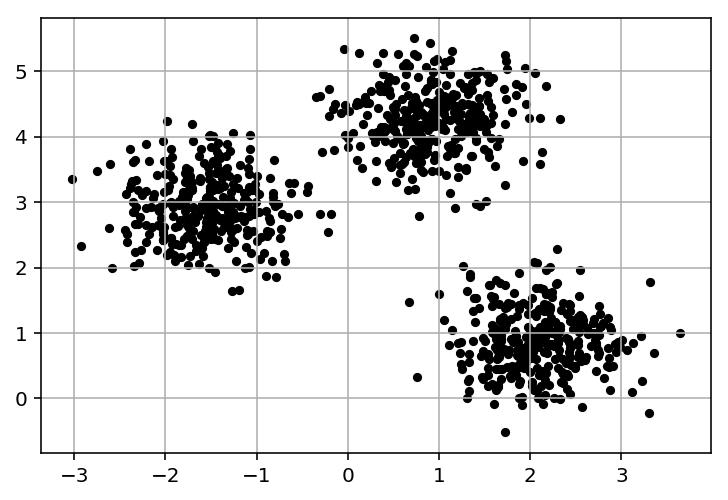

In [3]:
# plot libary
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
            X[:, 1],
            c='black',
            marker='o',
            s=13,)
plt.grid()
plt.show()

### K-means init centers:

- Random seed centers sometimes lead to bad clusterings or slow convergence if the initial centroids are chosen poorly.

- Another strategy is to place the initial centroids far away from each other via the k-means++ algorithm
- Using the K-mean++ init will speed the convergence

#### The initialization in k-means++ can be summarized as follows: 

1. Initialize an empty set $M$ to store the k centroids being selected. 
2. Randomly choose the first centroid $\mu^{(j)}$ from the input samples and assign it to $M$. 
3. For each sample $x^{(i)}$ ix that is not in $M$, find the minimum squared distance $d(x^{(i)}, M)^2$ to any of the centroids in M. 
4. To randomly select the next centroid $\mu^{(p)}$ , use a weighted probability 
   distribution equal to $\frac{d(\mu^{(p)}, M)^2}{\sum_{n=1} d(x^{(i)}, M)^2}$
5. Repeat steps 2 and 3 until k centroids are chosen. 
6. Proceed with the classic k-means algorithm.

In [4]:
# modelling 
from sklearn.cluster import KMeans, MiniBatchKMeans
from datetime import datetime

In [5]:
%%timeit
km = KMeans(n_clusters=3,
           init='random', # by defaut " k-means++"
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0,)

y_km = km.fit_predict(X)

100 loops, best of 3: 16.4 ms per loop


In [6]:
%%timeit
km = KMeans(n_clusters=3,
           init='k-means++', # by defaut " k-means++"
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0,)

y_km = km.fit_predict(X)

100 loops, best of 3: 13.1 ms per loop


In [7]:
%%timeit
km = MiniBatchKMeans(n_clusters=3,
           init='k-means++', # by defaut " k-means++"
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0,)

y_km = km.fit_predict(X)

100 loops, best of 3: 12.4 ms per loop


### Evaluation the model with Two Metrics

- The within-cluster SSE (distortion)

Based on this Euclidean distance metric, we can describe the k-means algorithm  as a simple optimization problem, an iterative approach for minimizing the withincluster sum of squared errors (SSE), which is sometimes also called cluster inertia:

$$SSE=\sum_{i=1}^n\sum_{j=1}^kw^{(i,j)}\|x^{(i)}-\mu^{(j)}\|_2^2$$

Here, $\mu^{(j)}$ is the representative point (centroid) for cluster $j$, and $w^{(i, j)}=1$ if the sample 
$x^{(i)}$ is in cluster $j$; $w^{(i,j)}=0$ otherwise.

- Silhouette analysis

Silhouette analysis can be used as a graphical tool to plot a measure of how tightly grouped the samples in the clusters are. To calculate the silhouette coefficient of a single sample in our dataset, we can apply the following three steps: 


1. Calculate the cluster cohesion $a^{(i)}$ as the average distance between a sample $x^{(i)}$ and all other points in the same cluster. 
2. Calculate the cluster separation $b^{(i)}$ from the next closest cluster as  the average distance between the sample $x^{(i)}$ and all samples in the  nearest cluster. 
3. Calculate the silhouette $s^{(i)}$ as the difference between cluster cohesion and separation divided by the greater of the two, as shown here:


$$s^{(i)} = \frac{b^{(i)}-a^{(i)}}{max\{b^{(i)}, a^{(i)}\}}$$

#### Using the elbow method to find the optimal number of clusters

Based on the within-cluster SSE, we can use a graphical tool, the so-called elbow method, to estimate the optimal number of clusters k for a given task. 

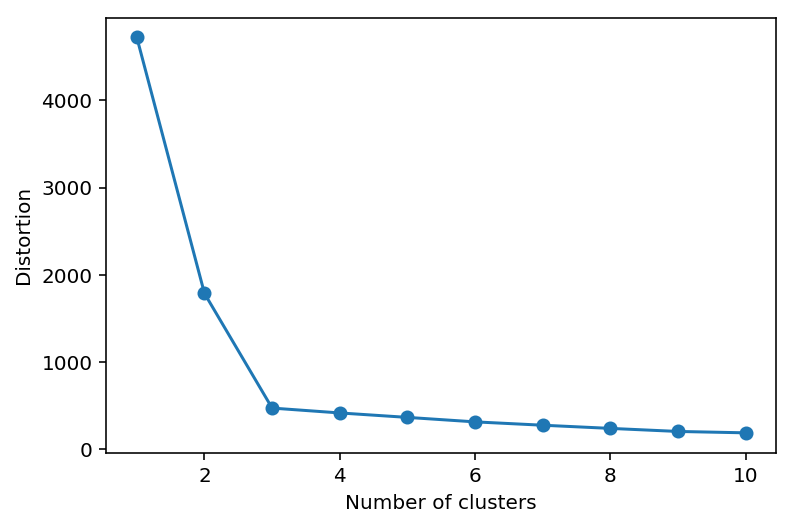

In [8]:
distortions = [] 
for i in range(1, 11): 
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0) 
    km.fit(X) 
    distortions.append(km.inertia_) 
plt.plot(range(1,11), distortions, marker='o') 
plt.xlabel('Number of clusters') 
plt.ylabel('Distortion') 
plt.show()

#### Quantifying the quality of clustering via silhouette plots 

By executing the following code, we will now create a plot of the silhouette coefficients for a k-means clustering with K = 3 

([<matplotlib.axis.YTick at 0x118f0c7f0>,
 <a list of 3 Text yticklabel objects>)

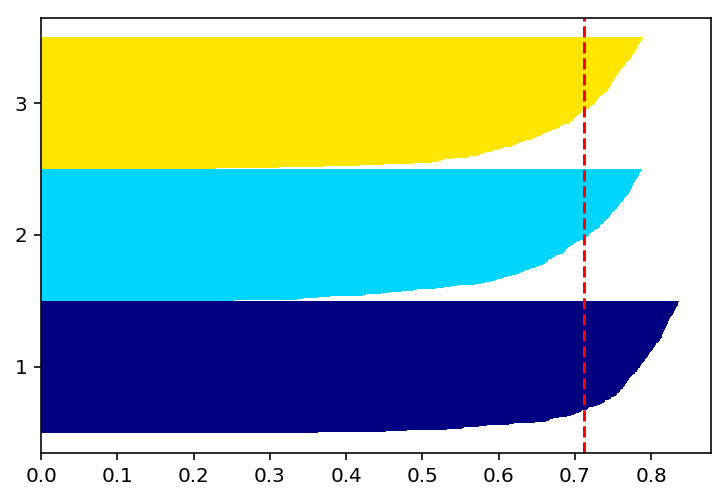

In [9]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10,
            max_iter=300, 
            tol=1e-04, 
            random_state=0) 
y_km = km.fit_predict(X)

import numpy as np 
from matplotlib import cm 
from sklearn.metrics import silhouette_samples 
cluster_labels = np.unique(y_km) 
n_clusters = cluster_labels.shape[0] 
silhouette_vals = silhouette_samples(X, 
                                     y_km, 
                                     metric='euclidean') 
y_ax_lower, y_ax_upper = 0, 0 
yticks = [] 
for i, c in enumerate(cluster_labels): 
    c_silhouette_vals = silhouette_vals[y_km == c] 
    c_silhouette_vals.sort() 
    y_ax_upper += len(c_silhouette_vals) 
    color = cm.jet(i / n_clusters) 
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, 
             height=1.0, 
             edgecolor='none', 
             color=color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2) 
    y_ax_lower += len(c_silhouette_vals) 
silhouette_avg = np.mean(silhouette_vals) 
plt.axvline(silhouette_avg, 
            color="red", 
            linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)

To see how a silhouette plot looks for a relatively bad clustering, let's seed the k-means algorithm with two centroids only:

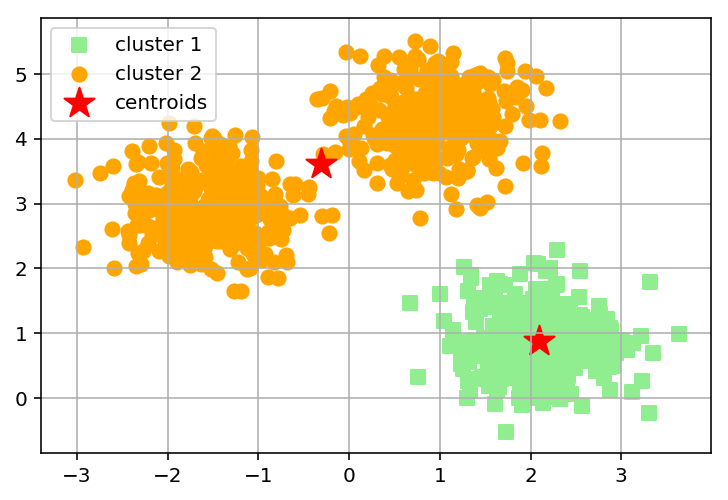

In [10]:
km = KMeans(n_clusters=2, 
             init='k-means++', 
             n_init=10, 
             max_iter=300, 
             tol=1e-04, 
             random_state=0) 

y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], 
             X[y_km==0,1], 
             s=50, c='lightgreen', 
             marker='s', 
             label='cluster 1') 

plt.scatter(X[y_km==1,0], 
             X[y_km==1,1], 
             s=50, 
             c='orange', 
             marker='o', 
             label='cluster 2') 

plt.scatter(km.cluster_centers_[:,0], 
             km.cluster_centers_[:,1], 
             s=250, 
             marker='*', 
             c='red', 
             label='centroids') 
             
plt.legend() 
plt.grid()
plt.show()

line in red is the overall average of silhouette

([<matplotlib.axis.YTick at 0x11b149f98>,
 <a list of 2 Text yticklabel objects>)

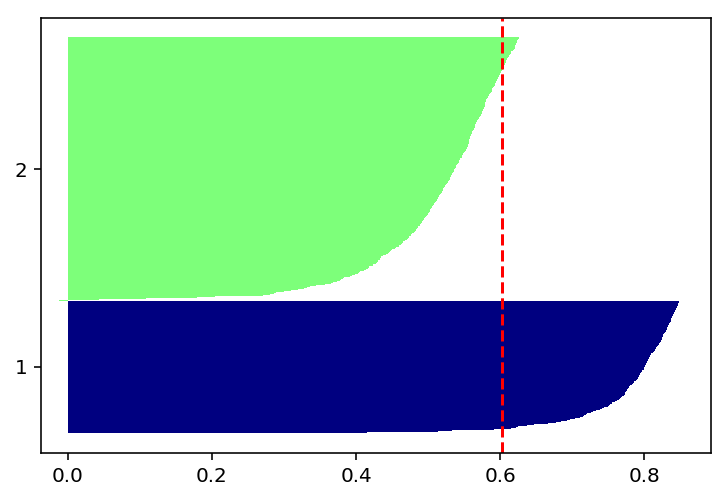

In [11]:
cluster_labels = np.unique(y_km) 
n_clusters = cluster_labels.shape[0] 
silhouette_vals = silhouette_samples(X, 
                                     y_km, 
                                     metric='euclidean') 
y_ax_lower, y_ax_upper = 0, 0 
yticks = [] 
for i, c in enumerate(cluster_labels): 
    c_silhouette_vals = silhouette_vals[y_km == c] 
    c_silhouette_vals.sort() 
    y_ax_upper += len(c_silhouette_vals) 
    color = cm.jet(i / n_clusters) 
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, 
             height=1.0, 
             edgecolor='none', 
             color=color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2) 
    y_ax_lower += len(c_silhouette_vals) 
silhouette_avg = np.mean(silhouette_vals) 
plt.axvline(silhouette_avg, 
            color="red", 
            linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)

## Density-based clustering: Locating regions of high density via DBSCAN 

In **DBSCAN**, a special label is assigned to each sample (point) using the  following criteria: 
- A point is considered as **core point** if at least a specified number (MinPts) of neighboring points fall within the specified radius $\epsilon$
- A **border point** is a point that has fewer neighbors than MinPts within $\epsilon$ ,  but lies within the ε radius of a core point 
- All other points that are neither core nor border points are considered as **noise points**

One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different from k-means and hierarchical clustering in that it doesn't necessarily assign each point to a cluster but is capable of removing noise points. 

![DBSCAN](img/600px-DBSCAN-Illustration.svg.png)

In this diagram, minPts = 4. Point A and the other red points are core points, because the area surrounding these points in an ε radius contain at least 4 points (including the point itself). Because they are all reachable from one another, they form a single cluster. Points B and C are not core points, but are reachable from A (via other core points) and thus belong to the cluster as well. Point N is a noise point that is neither a core point nor density-reachable.

via: https://en.wikipedia.org/wiki/DBSCAN

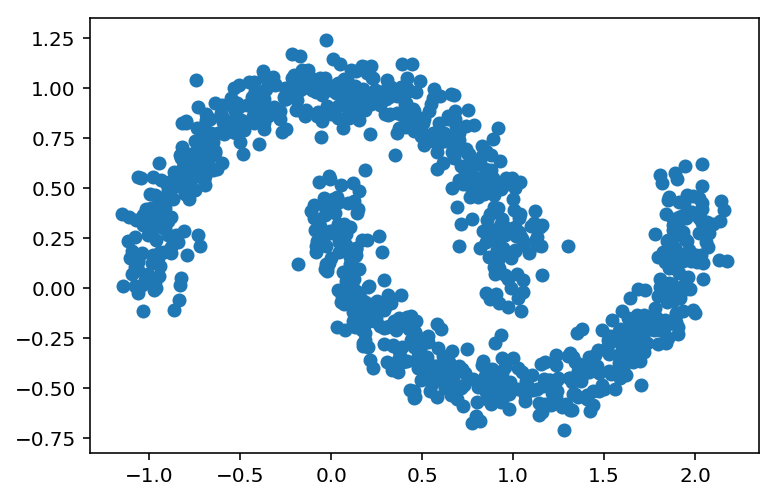

In [12]:
# create demo dataset
import matplotlib.pylab as plt
from sklearn.datasets import make_moons 
# 1_000 sample points
X, y = make_moons(n_samples=1000, 
                  noise=0.09, 
                  random_state=0) 
plt.scatter(X[:,0], X[:,1]) 
plt.show()

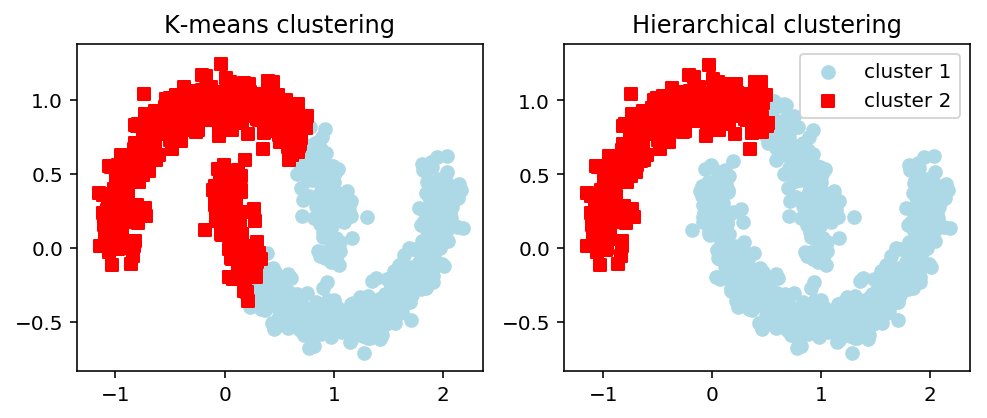

In [13]:
from sklearn.cluster import AgglomerativeClustering, KMeans
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3)) 
km = KMeans(n_clusters=2, 
            random_state=0) 
y_km = km.fit_predict(X) 
ax1.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            c='lightblue', 
            marker='o', 
            s=40, 
            label='cluster 1') 
ax1.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            c='red', 
            marker='s', 
            s=40, 
            label='cluster 2') 
ax1.set_title('K-means clustering') 
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
y_ac = ac.fit_predict(X) 
ax2.scatter(X[y_ac==0,0], 
            X[y_ac==0,1], 
            c='lightblue', 
            marker='o', 
            s=40, 
            label='cluster 1') 
ax2.scatter(X[y_ac==1,0], 
            X[y_ac==1,1], 
            c='red', 
            marker='s', 
            s=40, 
            label='cluster 2') 
ax2.set_title('Hierarchical clustering') 
plt.legend() 
plt.show() 

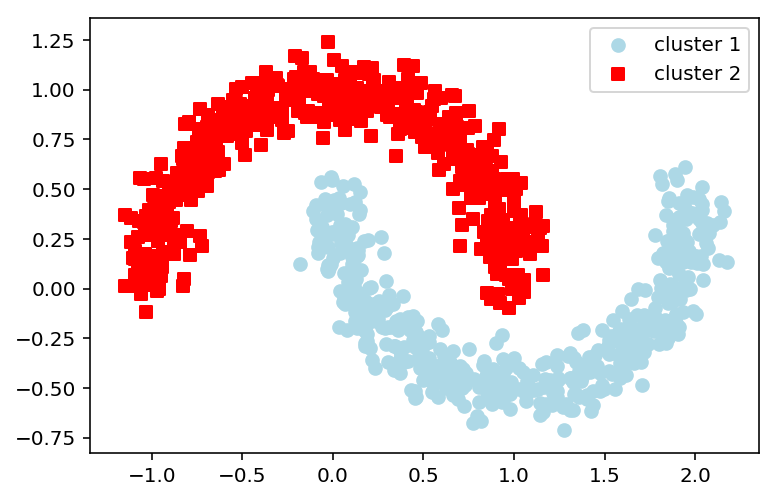

In [14]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=0.15, 
            min_samples=20, 
            metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db==0,0], 
            X[y_db==0,1], 
            c='lightblue', 
            marker='o', 
            s=40, 
            label='cluster 1') 
plt.scatter(X[y_db==1,0], 
            X[y_db==1,1], 
            c='red', 
            marker='s', 
            s=40, 
            label='cluster 2') 
plt.legend() 
plt.show()

### DBSCAN: determine the eps

- Find the eblow for the eps values
- set the n_neighbors = min_sample


In [15]:
# try find eps from NearestNeighbors
% matplotlib inline
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np

def kNN_plot(X, k=int):
    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=k+1, 
                            algorithm='ball_tree',
                            metric='euclidean').fit(X) # n_neighors set the min_sample size
    distances, indices = nbrs.kneighbors(X)
    # first columns is zero, drop
    k_dis = np.ravel(distances[:, 1:])
    # order by distance
    k_dis.sort()
    k_dis_series = pd.Series(k_dis)
    y_max = k_dis_series.max()
    x_max = len(k_dis_series)
    ax = k_dis_series.plot(xlim=(-x_max * 0.05, x_max * 1.05 ), ylim=( -y_max * 0.1, y_max * 1.1))
    ax.set(ylabel="%s-NN distance" % k, xlabel="Pointes(sample) sorted by distance")

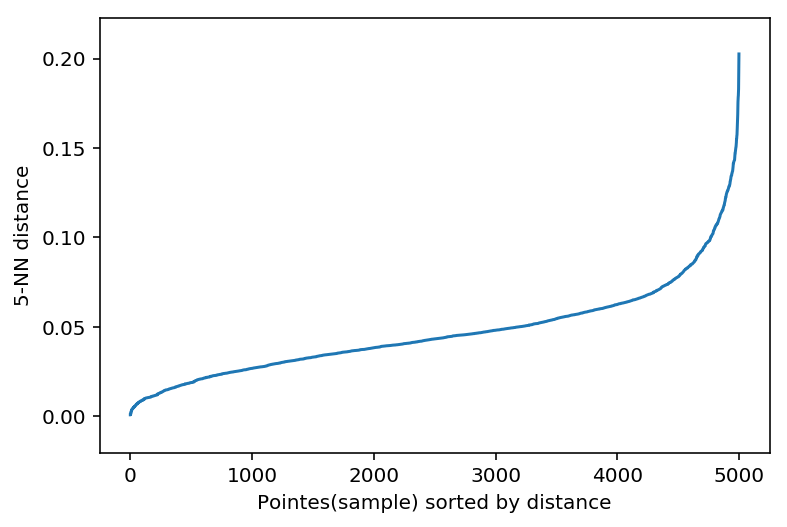

In [16]:
kNN_plot(X, k=5)

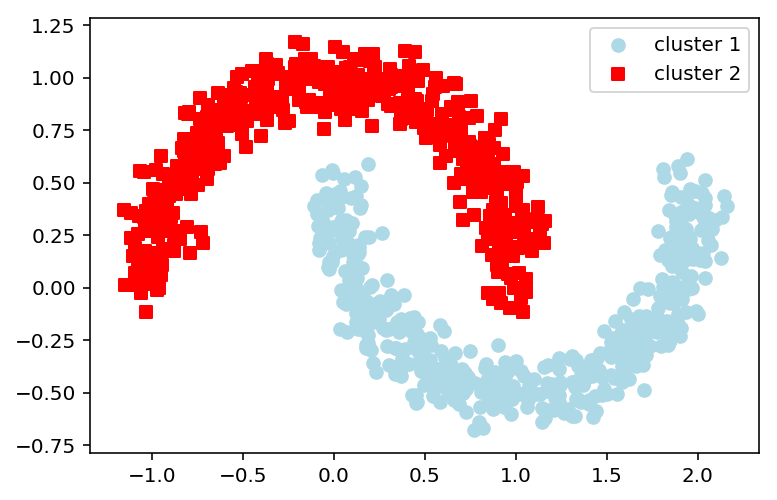

In [17]:
# try changing different eps,see how the images change
db = DBSCAN(eps=0.1, 
            min_samples=5, 
            metric='euclidean',
            n_jobs=-1)

y_db = db.fit_predict(X)

plt.scatter(X[y_db==0,0], 
            X[y_db==0,1], 
            c='lightblue', 
            marker='o', 
            s=40, 
            label='cluster 1') 
plt.scatter(X[y_db==1,0], 
            X[y_db==1,1], 
            c='red', 
            marker='s', 
            s=40, 
            label='cluster 2') 
plt.legend() 
plt.show()

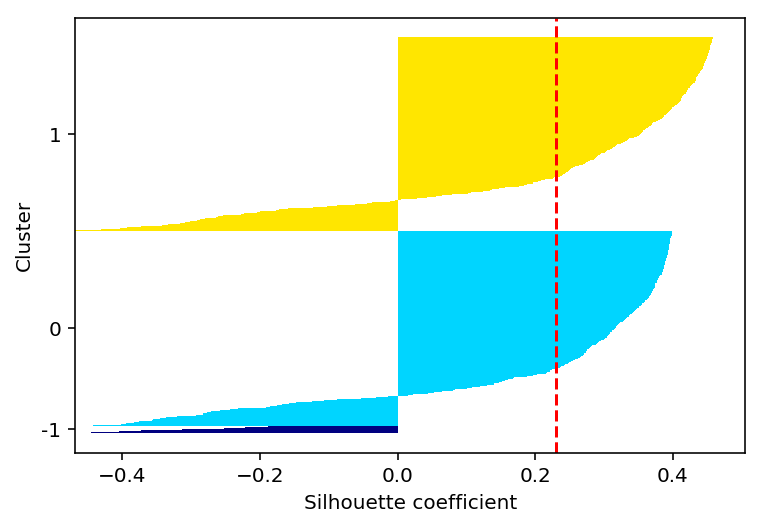

In [18]:
# plot silhouette for DBSCAN
% matplotlib inline
from matplotlib import cm 
from sklearn.metrics import silhouette_samples

labels = y_db

cluster_labels = np.unique(labels) 
n_clusters = cluster_labels.shape[0] 
silhouette_vals = silhouette_samples(X, labels, metric='euclidean') 
y_ax_lower, y_ax_upper = 0, 0 
yticks = [] 
for i, c in enumerate(cluster_labels): 
     c_silhouette_vals = silhouette_vals[labels == c] 
     c_silhouette_vals.sort() 
     y_ax_upper += len(c_silhouette_vals)
     color = cm.jet(i / n_clusters) 
     plt.barh(range(y_ax_lower, y_ax_upper), 
              c_silhouette_vals, 
              height=1.0, 
              edgecolor='none', 
              color=color) 
     yticks.append((y_ax_lower + y_ax_upper) / 2) 
     y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals) 
plt.axvline(silhouette_avg, 
             color="red", 
             linestyle="--") 
plt.yticks(yticks, cluster_labels)
plt.ylabel('Cluster') 
plt.xlabel('Silhouette coefficient')

## Compairsion of Two Clusters

### K-means:

**Pos:**

- Work well for clusters are grouped into spherical shapes 
- Converge relatively fast, with time complexity $O(n)$, $n$ for samlpe size
- We can specifically set the number of clusters we want(by K-values).
- Each clusters can be repersened by their centers - the mean value of the features we put in clustering

**Con:**

- Work not well with clusters in non-sherical shapes
- The results may not be repeatable and lack consistency.K-means starts with a random choice of cluster centers, therefore it may yield different clustering results on different runs of the algorithm.

### DBSCAN:

**Pos:**

- Try to find out all the possible clusters, without intructions
- Work well for clustering data of arbitrary shapes

**Con:**
- High time complexity $O(n^2)$, $n$ for samlpe size
- Two hyperparameters need to be tune, (MinPts and $\epsilon$)